# Data Pre-Analysis: FFT

In [1]:
import datetime
from numpy.fft import rfft
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
# SVG Graphing
set_matplotlib_formats('svg')

Load all data from station 583620

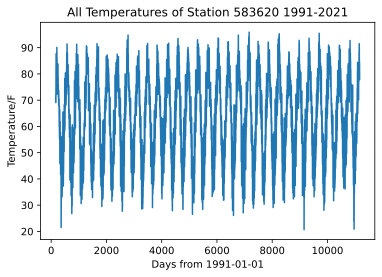

In [2]:
basedate = datetime.date(1991,1,1)
rawd = np.asarray([
    (
        (datetime.datetime.strptime(l.split()[2], "%Y%m%d").date() - basedate).days,
        float(l.split()[3])
    )
    for year in range(1991,2022)
    for l in open(f"../GSOD/{year}/583620-99999-{year}.op").read().splitlines()[1:]
]).T
plt.xlabel("Days from 1991-01-01")
plt.ylabel("Temperature/F")
plt.title("All Temperatures of Station 583620 1991-2021")
plt.plot(rawd[0], rawd[1])

Uncontinuous points:

In [3]:
uc = np.argwhere(rawd[0][:-1] - rawd[0][1:] != -1).flatten()
uc, rawd[0][uc], rawd[0][uc+1]

(array([ 2618,  2764,  4148,  5914,  9951, 10828]),
 array([ 2783.,  2930.,  4315.,  6082., 10120., 10998.]),
 array([ 2785.,  2932.,  4317.,  6084., 10122., 11001.]))

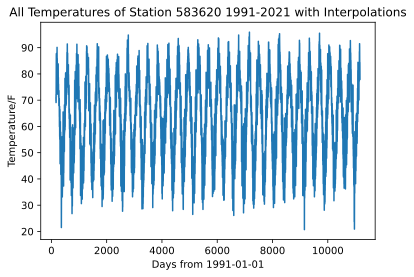

In [4]:
interpolations = (rawd[1][uc] + rawd[1][uc+1])/2
missingdates = rawd[0][uc] + 1
d = np.asarray([
    np.insert(rawd[0], uc+1, missingdates),
    np.insert(rawd[1], uc+1, interpolations)
])
plt.xlabel("Days from 1991-01-01")
plt.ylabel("Temperature/F")
plt.title("All Temperatures of Station 583620 1991-2021 with Interpolations")
plt.plot(d[0], d[1])

Linearly interpolate a value for them

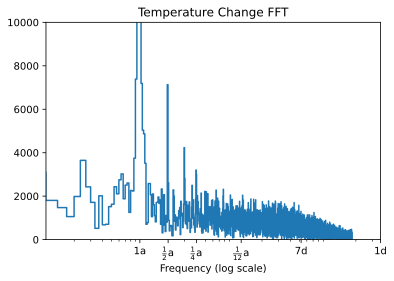

In [5]:
fft = rfft(d[1])
f_per_dataset = np.arange(len(fft))
n_samples_d = len(d[1])
days_per_year = 365.2524
years_per_dataset = n_samples_d/days_per_year
f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 10000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks(
    [1, 2, 4, 12, days_per_year/7, days_per_year],
    labels=['1a', '$\\frac{1}{2}$a', '$\\frac{1}{4}$a', '$\\frac{1}{12}$a', '7d', '1d']
)
plt.xlabel('Frequency (log scale)')
plt.title('Temperature Change FFT')
plt.show()